In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay





In [3]:
train = pd.read_csv('/content/drive/MyDrive/load default prediction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/load default prediction/test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (614, 13)
Test shape: (367, 12)


In [4]:
#Exploring and cleaning the data
print(train.isnull().sum())  # Check missing values

# Fill missing categorical values with mode, numerical with median
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)

# Drop Loan_ID
train.drop('Loan_ID', axis=1, inplace=True,errors='ignore')

# Encode categorical variables
cat_cols = train.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<ipython-input-4-10cc41422843>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
<ipython-input-4-10cc41422843>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [5]:
# Step 4: Prepare data for modeling
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 5: Train classification models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [7]:
# Step 6: Evaluate Models
models = {
    'Logistic Regression': (logreg, X_test_scaled),
    'Decision Tree': (dtree, X_test),
    'Random Forest': (rf, X_test)
}

for name, (model, test_data) in models.items():
    y_pred = model.predict(test_data)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Accuracy: 0.7724
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123


Random Forest Accuracy: 0.7561
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77   

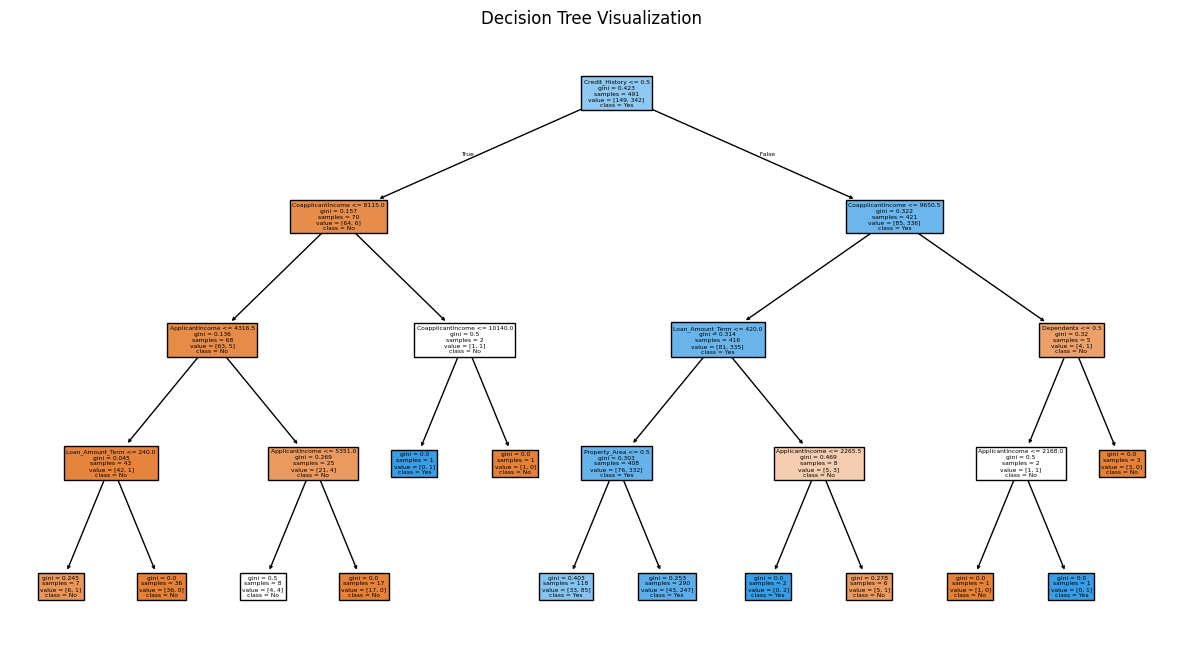

In [8]:
# Step 7: Visualize Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree Visualization")
plt.show()

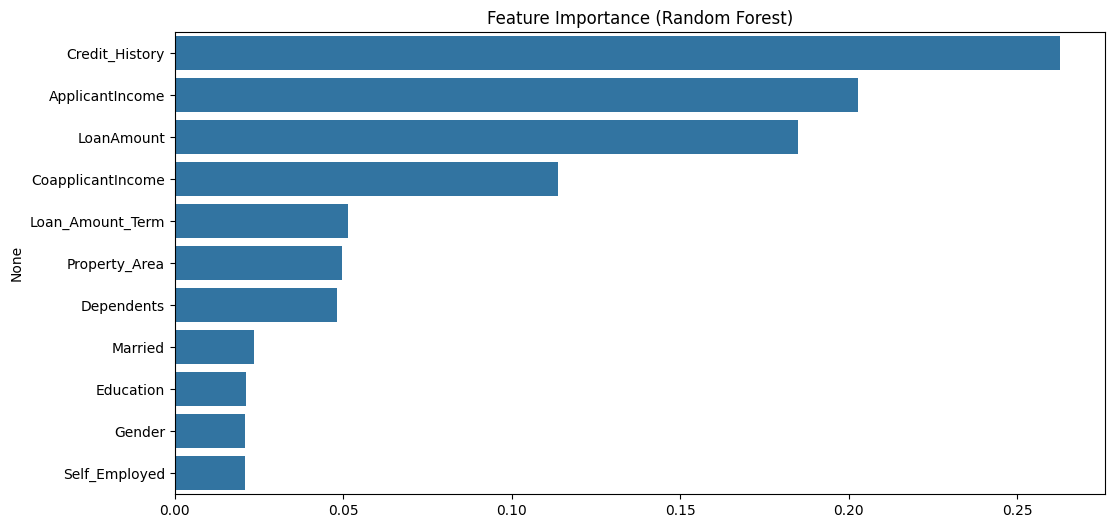

In [9]:
# Step 8: Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

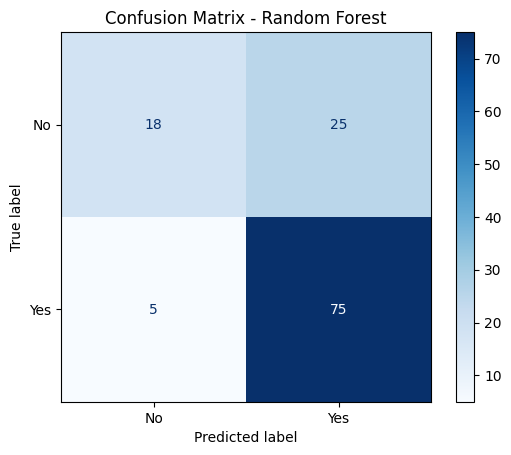

In [10]:
# Step 9: Confusion Matrix
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [11]:
# Step 10: Show Predictions
preds_df = X_test.copy()
preds_df['Actual'] = y_test.values
preds_df['Predicted'] = y_pred_rf
print(preds_df.head(10))  # Show first 10 predictions

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
350       1        1           0          0              0             9083   
377       1        1           0          0              0             4310   
163       1        1           2          0              0             4167   
609       0        0           0          0              0             2900   
132       1        0           0          0              0             2718   
578       1        1           1          0              0             1782   
316       1        1           2          0              0             3717   
2         1        1           0          0              1             3000   
340       1        1           3          1              0             2647   
77        1        1           1          0              1             1000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
350                0.0       228.0             360.0      